## Exercise
### Use wine data set to perform wine classification using KNN Classification

### Signature of Function

In [1]:
from inspect import signature
from sklearn.neighbors import KNeighborsClassifier
sign = signature(KNeighborsClassifier)
print(sign)

(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)


In [2]:
## Here in KNN n_neighbors is a hyper- parameter

In [3]:
## Grid search and train the data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
DATA = datasets.load_wine()
X = DATA.data
y = 1 - DATA.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 128546)
DATA
print(X)
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [5]:
param_grid = {'n_neighbors':range(1,20)}
GS = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'accuracy')
GS.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy')

In [6]:
GS.best_params_

{'n_neighbors': 6}

In [7]:
GS.best_score_

0.7605911330049262

## Use the Optimal hyper parameter

In [8]:
#from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
KNNClassifier = KNeighborsClassifier(n_neighbors=14)
KNNClassifier.fit(X_train, y_train)
y_pred = KNNClassifier.predict(X_test)
#precision_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6944444444444444

In [58]:
import pandas as pd
gsResult = pd.DataFrame(GS.cv_results_)
gsResult

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000800,0.000400,0.002402,0.000486,1,{'n_neighbors': 1},0.708333,0.750000,0.750000,0.750000,0.652174,0.722101,0.038508,17
1,0.000799,0.000399,0.002398,0.000489,2,{'n_neighbors': 2},0.708333,0.750000,0.791667,0.625000,0.652174,0.705435,0.061216,19
2,0.001003,0.000005,0.001798,0.000399,3,{'n_neighbors': 3},0.708333,0.708333,0.791667,0.708333,0.652174,0.713768,0.044611,18
3,0.001006,0.000006,0.002018,0.000035,4,{'n_neighbors': 4},0.708333,0.750000,0.791667,0.791667,0.608696,0.730072,0.068102,16
4,0.000593,0.000484,0.002188,0.000225,5,{'n_neighbors': 5},0.708333,0.750000,0.791667,0.750000,0.695652,0.739130,0.034162,13
5,0.001146,0.000445,0.001795,0.000396,6,{'n_neighbors': 6},0.708333,0.750000,0.833333,0.875000,0.739130,0.781159,0.062561,2
6,0.000400,0.000490,0.001801,0.000393,7,{'n_neighbors': 7},0.708333,0.666667,0.791667,0.791667,0.739130,0.739493,0.048413,12
7,0.000762,0.000449,0.001103,0.000160,8,{'n_neighbors': 8},0.708333,0.708333,0.791667,0.791667,0.695652,0.739130,0.043145,13
8,0.000162,0.000324,0.001350,0.000300,9,{'n_neighbors': 9},0.708333,0.666667,0.791667,0.833333,0.695652,0.739130,0.062808,13
9,0.000599,0.000489,0.001432,0.000409,10,{'n_neighbors': 10},0.750000,0.666667,0.791667,0.833333,0.695652,0.747464,0.060904,10


<AxesSubplot:xlabel='param_n_neighbors'>

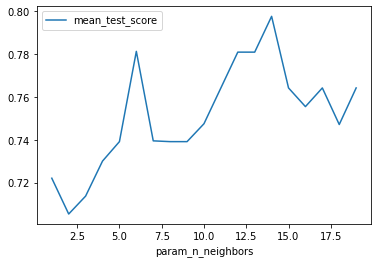

In [59]:
gsResult.plot('param_n_neighbors', 'mean_test_score')